In [331]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [332]:
raw_dataframe = pd.read_csv('new_york_by_city_2013_crime.csv')

In [333]:
dataframe = raw_dataframe.copy()

In [334]:
# nothing contained within this column
dataframe = dataframe.drop(dataframe.columns[4], axis=1)

In [335]:
# removes superscripts from column headers
dataframe.rename(columns = {list(dataframe)[4]: 'Rape', 
                            'Arson3': 'Arson', 
                            list(dataframe)[3]: 'Murder/Manslaughter', 
                            list(dataframe)[2]: 'Violent Crime', 
                            list(dataframe)[7]: 'Property Crime'}, inplace=True)

In [336]:
dataframe.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated assault,Property Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,nan


In [337]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                   348 non-null object
Population             348 non-null object
Violent Crime          348 non-null object
Murder/Manslaughter    348 non-null int64
Rape                   348 non-null object
Robbery                348 non-null object
Aggravated
assault     348 non-null object
Property Crime         348 non-null object
Burglary               348 non-null object
Larceny-
theft         348 non-null object
Motor
vehicle
theft    348 non-null object
Arson                  187 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 32.7+ KB


In [338]:
# changes population and robbery columns to int types

for value in ['Population', 'Robbery', 'Violent Crime', 'Property Crime', 'Rape', 'Burglary']:
    dataframe[value] = dataframe[value].str.replace(',', '').astype(int)

In [339]:
dataframe['Population'].sort_values(ascending=False)[:5] # extreme outlier at the top
#sns.distplot(dataframe['Population'])

216    8396126
35      258789
272     210562
346     199134
310     143834
Name: Population, dtype: int32

In [340]:
df = dataframe.drop(dataframe.index[216])

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 12 columns):
City                   347 non-null object
Population             347 non-null int32
Violent Crime          347 non-null int32
Murder/Manslaughter    347 non-null int64
Rape                   347 non-null int32
Robbery                347 non-null int32
Aggravated
assault     347 non-null object
Property Crime         347 non-null int32
Burglary               347 non-null int32
Larceny-
theft         347 non-null object
Motor
vehicle
theft    347 non-null object
Arson                  187 non-null float64
dtypes: float64(1), int32(6), int64(1), object(4)
memory usage: 27.1+ KB


In [342]:
df['Population Squared'] = df['Population'] ** 2

In [343]:
murders_happened = (df['Murder/Manslaughter'] > 1)
robberies_happened = (df['Robbery'] > 1)

In [344]:
# add boolean columns for murders and robberies
df['Murders Happened'] = murders_happened
df['Robberies Happened'] = robberies_happened

In [349]:
# Instantiate our model.
regr = linear_model.LinearRegression()


# minus 1 is computed by the system itself
Y = df['Property Crime'].values.reshape(-1, 1)
X = df[['Population', 'Murder/Manslaughter', 'Population Squared']]

regr.fit(X, Y)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.74212841e-02   1.59495059e+02  -1.34830088e-08]]

Intercept: 
 [ 13.85327656]

R-squared:
0.928718726856


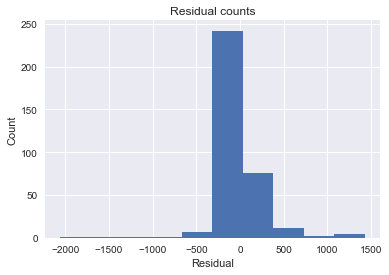

In [350]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [351]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Murder/Manslaughter,Population Squared
Population,1.000,0.756,0.176
Murder/Manslaughter,0.756,1.000,-0.076
Population Squared,0.176,-0.076,1.000
